In [40]:


!pip install PyGithub pandas > /dev/null 2>&1



In [41]:
# Define required imports
import pandas as pd
import numpy as np
import sys
import re
# These set pandas max column and row display in the notebook
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [42]:
!wget https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-data-jfk-airport.tar.gz

--2020-11-09 20:04:03--  https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-data-jfk-airport.tar.gz
Resolving dax-cdn.cdn.appdomain.cloud (dax-cdn.cdn.appdomain.cloud)... 23.55.57.25, 23.55.57.56, 2600:1408:9000::1730:24b7, ...
Connecting to dax-cdn.cdn.appdomain.cloud (dax-cdn.cdn.appdomain.cloud)|23.55.57.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3509993 (3.3M) [application/x-tar]
Saving to: ‘noaa-weather-data-jfk-airport.tar.gz’

noaa-weather-data-j 100%[===================>]   3.35M  --.-KB/s    in 0.06s   

2020-11-09 20:04:03 (55.4 MB/s) - ‘noaa-weather-data-jfk-airport.tar.gz’ saved [3509993/3509993]



In [43]:
!gunzip noaa-weather-data-jfk-airport.tar.gz

In [44]:
!tar -xvf noaa-weather-data-jfk-airport.tar

noaa-weather-data-jfk-airport/
noaa-weather-data-jfk-airport/clean_data.py
noaa-weather-data-jfk-airport/jfk_weather_cleaned.csv
noaa-weather-data-jfk-airport/LICENSE.txt
noaa-weather-data-jfk-airport/README.txt
noaa-weather-data-jfk-airport/jfk_weather.csv


In [45]:
raw_data = pd.read_csv('noaa-weather-data-jfk-airport/jfk_weather.csv', parse_dates=['DATE'])
raw_data.head()

/opt/app-root/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,20,22,23,25,40,63,64,67,68,69,84,85,86,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


STATION                     STATION_NAME  ELEVATION  LATITUDE  \
0  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   
1  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   
2  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   
3  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   
4  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   

   LONGITUDE                DATE REPORTTPYE           HOURLYSKYCONDITIONS  \
0   -73.7622 2010-01-01 00:51:00      FM-15  FEW:02 7 SCT:04 13 BKN:07 29   
1   -73.7622 2010-01-01 01:00:00      FM-12                           NaN   
2   -73.7622 2010-01-01 01:51:00      FM-15  FEW:02 6 SCT:04 13 OVC:08 35   
3   -73.7622 2010-01-01 02:03:00      FM-16  FEW:02 6 SCT:04 13 OVC:08 35   
4   -73.7622 2010-01-01 02:28:00      FM-16  BKN:07 7 BKN:07 15 OVC:08 35   

  HOURLYVISIBILITY                      HOURLYPRSENTWEATHERTYPE  \
0             6.00  -RA:02 PL:06 BR:1 |RA:61 PL:74 |RA:61 PL:79   
1             5.59                                      ||PL:79   
2             6.00  -RA:02 PL:06 BR:1 |RA:61 PL:74 |RA:61 PL:79   
3             6.00                    -RA:02 BR:1 |RA:61 |RA:61   
4             5.00                    -RA:02 BR:1 |RA:61 |RA:61   

  HOURLYDRYBULBTEMPF HOURLYDRYBULBTEMPC HOURLYWETBULBTEMPF HOURLYWETBULBTEMPC  \
0                 33                0.6                 32                0.1   
1                 33                0.6                 32                0.1   
2                 33                0.6                 33                0.3   
3                 34                  1                 33                0.7   
4                 34                  1                 33                0.7   

  HOURLYDewPointTempF HOURLYDewPointTempC HOURLYRelativeHumidity  \
0                  31                -0.6                     92   
1                  31                -0.6                     92   
2                  32                 0.0                     96   
3                  32                 0.0                     93   
4                  32                 0.0                     93   

  HOURLYWindSpeed HOURLYWindDirection  HOURLYWindGustSpeed  \
0               0                 000                  NaN   
1               0                 000                  NaN   
2               0                 000                  NaN   
3               0                 000                  NaN   
4               0                 000                  NaN   

  HOURLYStationPressure  HOURLYPressureTendency HOURLYPressureChange  \
0                 29.97                     8.0                  NaN   
1                 29.96                     8.0                +0.05   
2                 29.97                     NaN                  NaN   
3                 29.97                     NaN                  NaN   
4                 29.97                     NaN                  NaN   

  HOURLYSeaLevelPressure HOURLYPrecip  ... MonthlyGreatestPrecip  \
0                  29.99         0.01  ...                   NaN   
1                  29.99          NaN  ...                   NaN   
2                  29.99         0.02  ...                   NaN   
3                    NaN            T  ...                   NaN   
4                    NaN            T  ...                   NaN   

   MonthlyGreatestPrecipDate  MonthlyGreatestSnowfall  \
0                        NaN                      NaN   
1                        NaN                      NaN   
2                        NaN                      NaN   
3                        NaN                      NaN   
4                        NaN                      NaN   

   MonthlyGreatestSnowfallDate  MonthlyGreatestSnowDepth  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                          NaN                       NaN   
3                  

In [46]:


raw_data.dtypes



STATION                               object
STATION_NAME                          object
ELEVATION                            float64
LATITUDE                             float64
LONGITUDE                            float64
                                      ...   
MonthlyTotalCoolingDegreeDays         object
MonthlyDeptFromNormalHeatingDD        object
MonthlyDeptFromNormalCoolingDD        object
MonthlyTotalSeasonToDateHeatingDD    float64
MonthlyTotalSeasonToDateCoolingDD    float64
Length: 90, dtype: object

In [47]:
# Choose what columns to import from raw data
column_subset = [
    'DATE',
    'HOURLYVISIBILITY',
    'HOURLYDRYBULBTEMPF',
    'HOURLYWETBULBTEMPF',
    'HOURLYDewPointTempF',
    'HOURLYRelativeHumidity',
    'HOURLYWindSpeed',
    'HOURLYWindDirection',
    'HOURLYStationPressure',
    'HOURLYPressureTendency',
    'HOURLYSeaLevelPressure',
    'HOURLYPrecip',
    'HOURLYAltimeterSetting'
]

# Filter dataset to relevant columns
hourly_data = raw_data[column_subset]
# Set date index
hourly_data = hourly_data.set_index(pd.DatetimeIndex(hourly_data['DATE']))
hourly_data.drop(['DATE'], axis=1, inplace=True)
hourly_data.replace(to_replace='*', value=np.nan, inplace=True)
hourly_data.head()

HOURLYVISIBILITY HOURLYDRYBULBTEMPF HOURLYWETBULBTEMPF  \
DATE                                                                         
2010-01-01 00:51:00             6.00                 33                 32   
2010-01-01 01:00:00             5.59                 33                 32   
2010-01-01 01:51:00             6.00                 33                 33   
2010-01-01 02:03:00             6.00                 34                 33   
2010-01-01 02:28:00             5.00                 34                 33   

                    HOURLYDewPointTempF HOURLYRelativeHumidity  \
DATE                                                             
2010-01-01 00:51:00                  31                     92   
2010-01-01 01:00:00                  31                     92   
2010-01-01 01:51:00                  32                     96   
2010-01-01 02:03:00                  32                     93   
2010-01-01 02:28:00                  32                     93   

                    HOURLYWindSpeed HOURLYWindDirection HOURLYStationPressure  \
DATE                                                                            
2010-01-01 00:51:00               0                 000                 29.97   
2010-01-01 01:00:00               0                 000                 29.96   
2010-01-01 01:51:00               0                 000                 29.97   
2010-01-01 02:03:00               0                 000                 29.97   
2010-01-01 02:28:00               0                 000                 29.97   

                     HOURLYPressureTendency HOURLYSeaLevelPressure  \
DATE                                                                 
2010-01-01 00:51:00                     8.0                  29.99   
2010-01-01 01:00:00                     8.0                  29.99   
2010-01-01 01:51:00                     NaN                  29.99   
2010-01-01 02:03:00                     NaN                    NaN   
2010-01-01 02:28:00                     NaN                    NaN   

                    HOURLYPrecip HOURLYAltimeterSetting  
DATE                                                     
2010-01-01 00:51:00         0.01                  29.99  
2010-01-01 01:00:00          NaN                    NaN  
2010-01-01 01:51:00         0.02                  29.99  
2010-01-01 02:03:00            T                  29.99  
2010-01-01 02:28:00            T                  29.99

In [48]:


hourly_data.dtypes



HOURLYVISIBILITY           object
HOURLYDRYBULBTEMPF         object
HOURLYWETBULBTEMPF         object
HOURLYDewPointTempF        object
HOURLYRelativeHumidity     object
HOURLYWindSpeed            object
HOURLYWindDirection        object
HOURLYStationPressure      object
HOURLYPressureTendency    float64
HOURLYSeaLevelPressure     object
HOURLYPrecip               object
HOURLYAltimeterSetting     object
dtype: object

In [49]:


hourly_data['HOURLYPrecip'].unique()



array(['0.01', nan, '0.02', 'T', '0.00', '0.10', '0.07', '0.03', '0.05',
       '0.15', '0.06', '0.08', '0.04', '0.09', '0.11', '0.20', '0.13',
       '0.14', '0.05s', '0.12', '0.24', '0.02s', '0.17', '0.16', '0.47',
       '0.28', '0.32', '0.19', '0.22', '0.18', '0.26', '0.23', '0.30',
       '0.33', '0.04s', '0.36', '0.40', '0.41', '0.51', '0.50', '0.68s',
       '0.21', '0.35', '0.54', '0.01s', '0.34', '0.94', '1.14', '1.18',
       '1.15', '0.65', '0.74', '0.39', '0.67', '0.29', '0.46', '0.87',
       '1.10', '0.52', '0.08s', '0.37', '0.42', '0.03s', '0.09s', '0.11s',
       '0.10s', '0.25', '0.33s', '0.13s', '0.38', '0.64s', '0.06s',
       '0.17s', '0.69s', '0.73', '2.41', '0.57', '0.84', '0.86', '0.27',
       '0.60', '0.45', '0.75', '1.26', '0.59', '0.68', '0.79', '0.70',
       '0.44', '0.43', '0.53', '0.37s', '0.77', '0.85', '0.93', '0.55',
       '0.56', '1.52', '1.05', '1.76', '0.07s', '0.63', '1.19', '0.12s',
       '0.18s', '0.58', '0.48', '0.66', '0.29s', '0.71', '0.20s'

In [50]:
# Fix imported data
hourly_data['HOURLYPrecip'].replace(to_replace='T', value='0.00', inplace=True)
hourly_data['HOURLYPrecip'].replace('0.020.01s', np.nan, inplace=True)



In [51]:
# Set of columns to convert
messy_columns = column_subset[1:]

# Convert columns to float32 datatype
for i in messy_columns:
    hourly_data[i] = hourly_data[i].apply(lambda x: re.sub('[^0-9,.-]', '', x) if type(x) == str else x).replace('', np.nan).astype(('float32'))


In [52]:
print(hourly_data.info())
print()
hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114545 entries, 2010-01-01 00:51:00 to 2018-07-27 23:59:00
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   HOURLYVISIBILITY        96464 non-null   float32
 1   HOURLYDRYBULBTEMPF      111403 non-null  float32
 2   HOURLYWETBULBTEMPF      111245 non-null  float32
 3   HOURLYDewPointTempF     111395 non-null  float32
 4   HOURLYRelativeHumidity  111395 non-null  float32
 5   HOURLYWindSpeed         111358 non-null  float32
 6   HOURLYWindDirection     110444 non-null  float32
 7   HOURLYStationPressure   111256 non-null  float32
 8   HOURLYPressureTendency  48038 non-null   float32
 9   HOURLYSeaLevelPressure  99522 non-null   float32
 10  HOURLYPrecip            79762 non-null   float32
 11  HOURLYAltimeterSetting  86878 non-null   float32
dtypes: float32(12)
memory usage: 6.1 MB
None



HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  HOURLYWETBULBTEMPF  \
DATE                                                                            
2010-01-01 00:51:00              6.00                33.0                32.0   
2010-01-01 01:00:00              5.59                33.0                32.0   
2010-01-01 01:51:00              6.00                33.0                33.0   
2010-01-01 02:03:00              6.00                34.0                33.0   
2010-01-01 02:28:00              5.00                34.0                33.0   

                     HOURLYDewPointTempF  HOURLYRelativeHumidity  \
DATE                                                               
2010-01-01 00:51:00                 31.0                    92.0   
2010-01-01 01:00:00                 31.0                    92.0   
2010-01-01 01:51:00                 32.0                    96.0   
2010-01-01 02:03:00                 32.0                    93.0   
2010-01-01 02:28:00                 32.0                    93.0   

                     HOURLYWindSpeed  HOURLYWindDirection  \
DATE                                                        
2010-01-01 00:51:00              0.0                  0.0   
2010-01-01 01:00:00              0.0                  0.0   
2010-01-01 01:51:00              0.0                  0.0   
2010-01-01 02:03:00              0.0                  0.0   
2010-01-01 02:28:00              0.0                  0.0   

                     HOURLYStationPressure  HOURLYPressureTendency  \
DATE                                                                 
2010-01-01 00:51:00              29.969999                     8.0   
2010-01-01 01:00:00              29.959999                     8.0   
2010-01-01 01:51:00              29.969999                     NaN   
2010-01-01 02:03:00              29.969999                     NaN   
2010-01-01 02:28:00              29.969999                     NaN   

                     HOURLYSeaLevelPressure  HOURLYPrecip  \
DATE                                                        
2010-01-01 00:51:00                   29.99          0.01   
2010-01-01 01:00:00                   29.99           NaN   
2010-01-01 01:51:00                   29.99          0.02   
2010-01-01 02:03:00                     NaN          0.00   
2010-01-01 02:28:00                     NaN          0.00   

                     HOURLYAltimeterSetting  
DATE                                         
2010-01-01 00:51:00                   29.99  
2010-01-01 01:00:00                     NaN  
2010-01-01 01:51:00                   29.99  
2010-01-01 02:03:00                   29.99  
2010-01-01 02:28:00                   29.99

In [53]:
# Generate the summary statistics for each column
hourly_data.describe()

HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  HOURLYWETBULBTEMPF  \
count      96464.000000       111403.000000       111245.000000   
mean           8.758805           55.310612           49.703098   
std            2.742651           17.169744           16.062113   
min            0.000000            1.000000           -1.000000   
25%            9.940000           42.000000           37.000000   
50%           10.000000           56.000000           50.000000   
75%           10.000000           70.000000           64.000000   
max           99.419998          102.000000           85.000000   

       HOURLYDewPointTempF  HOURLYRelativeHumidity  HOURLYWindSpeed  \
count        111395.000000           111395.000000    111358.000000   
mean             43.309196               67.132141        11.268045   
std              19.357059               20.278572         6.175006   
min             -22.000000                8.000000         0.000000   
25%              29.000000               51.000000         7.000000   
50%              45.000000               69.000000        10.000000   
75%              60.000000               85.000000        15.000000   
max              84.000000              100.000000        53.000000   

       HOURLYWindDirection  HOURLYStationPressure  HOURLYPressureTendency  \
count        110444.000000          111256.000000            48038.000000   
mean            192.511597              29.990641                4.388963   
std             107.606514               0.238452                2.741795   
min               0.000000              28.490000                0.000000   
25%             110.000000              29.850000                2.000000   
50%             200.000000              29.990000                5.000000   
75%             280.000000              30.139999                7.000000   
max             360.000000              30.830000                8.000000   

       HOURLYSeaLevelPressure  HOURLYPrecip  HOURLYAltimeterSetting  
count            99522.000000  79762.000000            86878.000000  
mean                30.026194      0.007032               30.009533  
std                  0.233693      0.042636                0.239821  
min                 28.540001      0.000000               28.510000  
25%                 29.879999      0.000000               29.870001  
50%                 30.020000      0.000000               30.010000  
75%                 30.170000      0.000000               30.160000  
max                 30.850000      2.410000               30.850000

In [54]:


# Check if categorical variable HOURLYPressureTendency ever has a non-integer entry outside the bounds of 0-8
cond = len(hourly_data[~hourly_data['HOURLYPressureTendency'].isin(list(range(0,9)) + [np.nan])])
print('Hourly Pressure Tendency should be between 0 and 8: {}'.format(cond == 0))



Hourly Pressure Tendency should be between 0 and 8: True


In [55]:
# Hourly Visibility should be between 0 and 10
hourly_data[(hourly_data['HOURLYVISIBILITY'] < 0) | (hourly_data['HOURLYVISIBILITY'] > 10)]

HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  HOURLYWETBULBTEMPF  \
DATE                                                                            
2011-10-16 11:51:00         14.000000                68.0                53.0   
2015-06-21 17:45:00         99.419998                79.0                72.0   

                     HOURLYDewPointTempF  HOURLYRelativeHumidity  \
DATE                                                               
2011-10-16 11:51:00                 37.0                    33.0   
2015-06-21 17:45:00                 68.0                    70.0   

                     HOURLYWindSpeed  HOURLYWindDirection  \
DATE                                                        
2011-10-16 11:51:00             16.0                250.0   
2015-06-21 17:45:00             37.0                310.0   

                     HOURLYStationPressure  HOURLYPressureTendency  \
DATE                                                                 
2011-10-16 11:51:00                  29.85                     NaN   
2015-06-21 17:45:00                  29.74                     NaN   

                     HOURLYSeaLevelPressure  HOURLYPrecip  \
DATE                                                        
2011-10-16 11:51:00                     NaN           NaN   
2015-06-21 17:45:00                     NaN           0.0   

                     HOURLYAltimeterSetting  
DATE                                         
2011-10-16 11:51:00               29.870001  
2015-06-21 17:45:00               29.760000

In [56]:
# Replace any hourly visibility figure outside these bounds with nan
hourly_data.loc[hourly_data['HOURLYVISIBILITY'] > 10, 'HOURLYVISIBILITY'] = np.nan

# Hourly Visibility should be between 0 and 10
cond = len(hourly_data[(hourly_data['HOURLYVISIBILITY'] < 0) | (hourly_data['HOURLYVISIBILITY'] > 10)])
print('Hourly Visibility should be between 0 and 10: {}'.format(cond == 0))

Hourly Visibility should be between 0 and 10: True


In [57]:
cond = len(hourly_data[hourly_data.index.duplicated()].sort_index())
print('Date index contains no duplicate entries: {}'.format(cond == 0))

Date index contains no duplicate entries: True


In [58]:
# Make sure time index is sorted and increasing
print('Date index is strictly increasing: {}'.format(hourly_data.index.is_monotonic_increasing))

Date index is strictly increasing: True


In [59]:
# Resample (downsample) to hourly rows (we're shifting everything up by 9 minutes!)
hourly_data = hourly_data.resample('60min').last().shift(periods=1) #Note: use resample('60min', base=51) to resample on the 51st of every hour

In [60]:
hourly_data['HOURLYPressureTendency'] = hourly_data['HOURLYPressureTendency'].fillna(method='ffill') # fill with last valid observation
hourly_data = hourly_data.interpolate(method='linear') # interpolate missing values
hourly_data.drop(hourly_data.index[0], inplace=True) # drop first row

In [61]:
print(hourly_data.info())
print()
hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75119 entries, 2010-01-01 01:00:00 to 2018-07-27 23:00:00
Freq: 60T
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HOURLYVISIBILITY        75119 non-null  float32
 1   HOURLYDRYBULBTEMPF      75119 non-null  float32
 2   HOURLYWETBULBTEMPF      75119 non-null  float32
 3   HOURLYDewPointTempF     75119 non-null  float32
 4   HOURLYRelativeHumidity  75119 non-null  float32
 5   HOURLYWindSpeed         75119 non-null  float32
 6   HOURLYWindDirection     75119 non-null  float32
 7   HOURLYStationPressure   75119 non-null  float32
 8   HOURLYPressureTendency  75119 non-null  float32
 9   HOURLYSeaLevelPressure  75119 non-null  float32
 10  HOURLYPrecip            75119 non-null  float32
 11  HOURLYAltimeterSetting  75119 non-null  float32
dtypes: float32(12)
memory usage: 4.0 MB
None



HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  HOURLYWETBULBTEMPF  \
DATE                                                                            
2010-01-01 01:00:00               6.0                33.0                32.0   
2010-01-01 02:00:00               6.0                33.0                33.0   
2010-01-01 03:00:00               5.0                33.0                33.0   
2010-01-01 04:00:00               5.0                33.0                33.0   
2010-01-01 05:00:00               5.0                33.0                32.0   

                     HOURLYDewPointTempF  HOURLYRelativeHumidity  \
DATE                                                               
2010-01-01 01:00:00                 31.0                    92.0   
2010-01-01 02:00:00                 32.0                    96.0   
2010-01-01 03:00:00                 32.0                    96.0   
2010-01-01 04:00:00                 32.0                    96.0   
2010-01-01 05:00:00                 31.0                    92.0   

                     HOURLYWindSpeed  HOURLYWindDirection  \
DATE                                                        
2010-01-01 01:00:00              0.0                  0.0   
2010-01-01 02:00:00              0.0                  0.0   
2010-01-01 03:00:00              0.0                  0.0   
2010-01-01 04:00:00              0.0                  0.0   
2010-01-01 05:00:00              0.0                  0.0   

                     HOURLYStationPressure  HOURLYPressureTendency  \
DATE                                                                 
2010-01-01 01:00:00              29.969999                     8.0   
2010-01-01 02:00:00              29.969999                     8.0   
2010-01-01 03:00:00              29.969999                     8.0   
2010-01-01 04:00:00              29.950001                     8.0   
2010-01-01 05:00:00              29.930000                     8.0   

                     HOURLYSeaLevelPressure  HOURLYPrecip  \
DATE                                                        
2010-01-01 01:00:00               29.990000          0.01   
2010-01-01 02:00:00               29.990000          0.02   
2010-01-01 03:00:00               29.990000          0.00   
2010-01-01 04:00:00               29.969999          0.00   
2010-01-01 05:00:00               29.959999          0.00   

                     HOURLYAltimeterSetting  
DATE                                         
2010-01-01 01:00:00               29.990000  
2010-01-01 02:00:00               29.990000  
2010-01-01 03:00:00               29.990000  
2010-01-01 04:00:00               29.969999  
2010-01-01 05:00:00               29.950001

In [62]:
# Transform HOURLYWindDirection into a cyclical variable using sin and cos transforms
hourly_data['HOURLYWindDirectionSin'] = np.sin(hourly_data['HOURLYWindDirection']*(2.*np.pi/360))
hourly_data['HOURLYWindDirectionCos'] = np.cos(hourly_data['HOURLYWindDirection']*(2.*np.pi/360))
hourly_data.drop(['HOURLYWindDirection'], axis=1, inplace=True)

In [63]:
# Transform HOURLYPressureTendency into 3 dummy variables based on NOAA documentation
hourly_data['HOURLYPressureTendencyIncr'] = [1.0 if x in [0,1,2,3] else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 0 through 3 indicates an increase in pressure over previous 3 hours
hourly_data['HOURLYPressureTendencyDecr'] = [1.0 if x in [5,6,7,8] else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 5 through 8 indicates a decrease over previous 3 hours
hourly_data['HOURLYPressureTendencyConst'] = [1.0 if x == 4 else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 4 indicates no change during previous 3 hours
hourly_data.drop(['HOURLYPressureTendency'], axis=1, inplace=True)
hourly_data['HOURLYPressureTendencyIncr'] = hourly_data['HOURLYPressureTendencyIncr'].astype(('float32'))
hourly_data['HOURLYPressureTendencyDecr'] = hourly_data['HOURLYPressureTendencyDecr'].astype(('float32'))
hourly_data['HOURLYPressureTendencyConst'] = hourly_data['HOURLYPressureTendencyConst'].astype(('float32'))

In [64]:
hourly_data.columns

Index(['HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
       'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYStationPressure', 'HOURLYSeaLevelPressure', 'HOURLYPrecip',
       'HOURLYAltimeterSetting', 'HOURLYWindDirectionSin',
       'HOURLYWindDirectionCos', 'HOURLYPressureTendencyIncr',
       'HOURLYPressureTendencyDecr', 'HOURLYPressureTendencyConst'],
      dtype='object')

In [65]:
# define the new column names
columns_new_name = [
    'visibility',
    'dry_bulb_temp_f',
    'wet_bulb_temp_f',
    'dew_point_temp_f',
    'relative_humidity',
    'wind_speed',
    'station_pressure',
    'sea_level_pressure',
    'precip',
    'altimeter_setting',
    'wind_direction_sin',
    'wind_direction_cos',
    'pressure_tendency_incr',
    'pressure_tendency_decr',
    'pressure_tendency_const'
]

columns_name_map = {c:columns_new_name[i] for i, c in enumerate(hourly_data.columns)}

hourly_data_renamed = hourly_data.rename(columns=columns_name_map)

In [66]:
print(hourly_data_renamed.info())
print()
hourly_data_renamed.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75119 entries, 2010-01-01 01:00:00 to 2018-07-27 23:00:00
Freq: 60T
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   visibility               75119 non-null  float32
 1   dry_bulb_temp_f          75119 non-null  float32
 2   wet_bulb_temp_f          75119 non-null  float32
 3   dew_point_temp_f         75119 non-null  float32
 4   relative_humidity        75119 non-null  float32
 5   wind_speed               75119 non-null  float32
 6   station_pressure         75119 non-null  float32
 7   sea_level_pressure       75119 non-null  float32
 8   precip                   75119 non-null  float32
 9   altimeter_setting        75119 non-null  float32
 10  wind_direction_sin       75119 non-null  float32
 11  wind_direction_cos       75119 non-null  float32
 12  pressure_tendency_incr   75119 non-null  float32
 13  pressure_tendency_decr   75119 

visibility  dry_bulb_temp_f  wet_bulb_temp_f  \
DATE                                                                
2010-01-01 01:00:00         6.0             33.0             32.0   
2010-01-01 02:00:00         6.0             33.0             33.0   
2010-01-01 03:00:00         5.0             33.0             33.0   
2010-01-01 04:00:00         5.0             33.0             33.0   
2010-01-01 05:00:00         5.0             33.0             32.0   

                     dew_point_temp_f  relative_humidity  wind_speed  \
DATE                                                                   
2010-01-01 01:00:00              31.0               92.0         0.0   
2010-01-01 02:00:00              32.0               96.0         0.0   
2010-01-01 03:00:00              32.0               96.0         0.0   
2010-01-01 04:00:00              32.0               96.0         0.0   
2010-01-01 05:00:00              31.0               92.0         0.0   

                     station_pressure  sea_level_pressure  precip  \
DATE                                                                
2010-01-01 01:00:00         29.969999           29.990000    0.01   
2010-01-01 02:00:00         29.969999           29.990000    0.02   
2010-01-01 03:00:00         29.969999           29.990000    0.00   
2010-01-01 04:00:00         29.950001           29.969999    0.00   
2010-01-01 05:00:00         29.930000           29.959999    0.00   

                     altimeter_setting  wind_direction_sin  \
DATE                                                         
2010-01-01 01:00:00          29.990000                 0.0   
2010-01-01 02:00:00          29.990000                 0.0   
2010-01-01 03:00:00          29.990000                 0.0   
2010-01-01 04:00:00          29.969999                 0.0   
2010-01-01 05:00:00          29.950001                 0.0   

                     wind_direction_cos  pressure_tendency_incr  \
DATE                                                              
2010-01-01 01:00:00                 1.0                     0.0   
2010-01-01 02:00:00                 1.0                     0.0   
2010-01-01 03:00:00                 1.0                     0.0   
2010-01-01 04:00:00                 1.0                     0.0   
2010-01-01 05:00:00                 1.0                     0.0   

                     pressure_tendency_decr  pressure_tendency_const  
DATE                                                                  
2010-01-01 01:00:00                     1.0                      0.0  
2010-01-01 02:00:00                     1.0                      0.0  
2010-01-01 03:00:00                     1.0                      0.0  
2010-01-01 04:00:00                     1.0                      0.0  
2010-01-01 05:00:00                     1.0                      0.0

In [67]:
# Explore some general information about the dataset
print('# of megabytes held by dataframe: ' + str(round(sys.getsizeof(hourly_data_renamed) / 1000000,2)))
print('# of features: ' + str(hourly_data_renamed.shape[1])) 
print('# of observations: ' + str(hourly_data_renamed.shape[0]))
print('Start date: ' + str(hourly_data_renamed.index[0]))
print('End date: ' + str(hourly_data_renamed.index[-1]))
print('# of days: ' + str((hourly_data_renamed.index[-1] - hourly_data_renamed.index[0]).days))
print('# of months: ' + str(round((hourly_data_renamed.index[-1] - hourly_data_renamed.index[0]).days/30,2)))
print('# of years: ' + str(round((hourly_data_renamed.index[-1] - hourly_data_renamed.index[0]).days/365,2)))

# of megabytes held by dataframe: 5.11
# of features: 15
# of observations: 75119
Start date: 2010-01-01 01:00:00
End date: 2018-07-27 23:00:00
# of days: 3129
# of months: 104.3
# of years: 8.57


In [68]:
hourly_data_renamed.to_csv("noaa-weather-data-jfk-airport/jfk_weather_cleaned.csv", float_format='%g')

In [69]:
# Installing packages needed for data processing and visualization
!pip install pandas matplotlib seaborn numpy

     |████████████████████████████████| 11.6 MB 17.7 MB/s eta 0:00:01
     |████████████████████████████████| 283 kB 64.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 81.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 85.5 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 84.5 MB/s eta 0:00:01
You should consider upgrading via the '/opt/app-root/bin/python3.6 -m pip install --upgrade pip' command.


In [70]:


# Importing the packages
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame as df
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 160



In [72]:


data = pd.read_csv('noaa-weather-data-jfk-airport/jfk_weather_cleaned.csv', parse_dates=['DATE'])
# Set date index
data = data.set_index(pd.DatetimeIndex(data['DATE']))
data.drop(['DATE'], axis=1, inplace=True)
data.head()



visibility  dry_bulb_temp_f  wet_bulb_temp_f  \
DATE                                                                
2010-01-01 01:00:00         6.0             33.0             32.0   
2010-01-01 02:00:00         6.0             33.0             33.0   
2010-01-01 03:00:00         5.0             33.0             33.0   
2010-01-01 04:00:00         5.0             33.0             33.0   
2010-01-01 05:00:00         5.0             33.0             32.0   

                     dew_point_temp_f  relative_humidity  wind_speed  \
DATE                                                                   
2010-01-01 01:00:00              31.0               92.0         0.0   
2010-01-01 02:00:00              32.0               96.0         0.0   
2010-01-01 03:00:00              32.0               96.0         0.0   
2010-01-01 04:00:00              32.0               96.0         0.0   
2010-01-01 05:00:00              31.0               92.0         0.0   

                     station_pressure  sea_level_pressure  precip  \
DATE                                                                
2010-01-01 01:00:00             29.97               29.99    0.01   
2010-01-01 02:00:00             29.97               29.99    0.02   
2010-01-01 03:00:00             29.97               29.99    0.00   
2010-01-01 04:00:00             29.95               29.97    0.00   
2010-01-01 05:00:00             29.93               29.96    0.00   

                     altimeter_setting  wind_direction_sin  \
DATE                                                         
2010-01-01 01:00:00              29.99                 0.0   
2010-01-01 02:00:00              29.99                 0.0   
2010-01-01 03:00:00              29.99                 0.0   
2010-01-01 04:00:00              29.97                 0.0   
2010-01-01 05:00:00              29.95                 0.0   

                     wind_direction_cos  pressure_tendency_incr  \
DATE                                                              
2010-01-01 01:00:00                 1.0                       0   
2010-01-01 02:00:00                 1.0                       0   
2010-01-01 03:00:00                 1.0                       0   
2010-01-01 04:00:00                 1.0                       0   
2010-01-01 05:00:00                 1.0                       0   

                     pressure_tendency_decr  pressure_tendency_const  
DATE                                                                  
2010-01-01 01:00:00                       1                        0  
2010-01-01 02:00:00                       1                        0  
2010-01-01 03:00:00                       1                        0  
2010-01-01 04:00:00                       1                        0  
2010-01-01 05:00:00                       1                        0

In [73]:


# Columns to visualize
plot_cols = ['dry_bulb_temp_f', 'relative_humidity', 'wind_speed', 'station_pressure', 'precip']



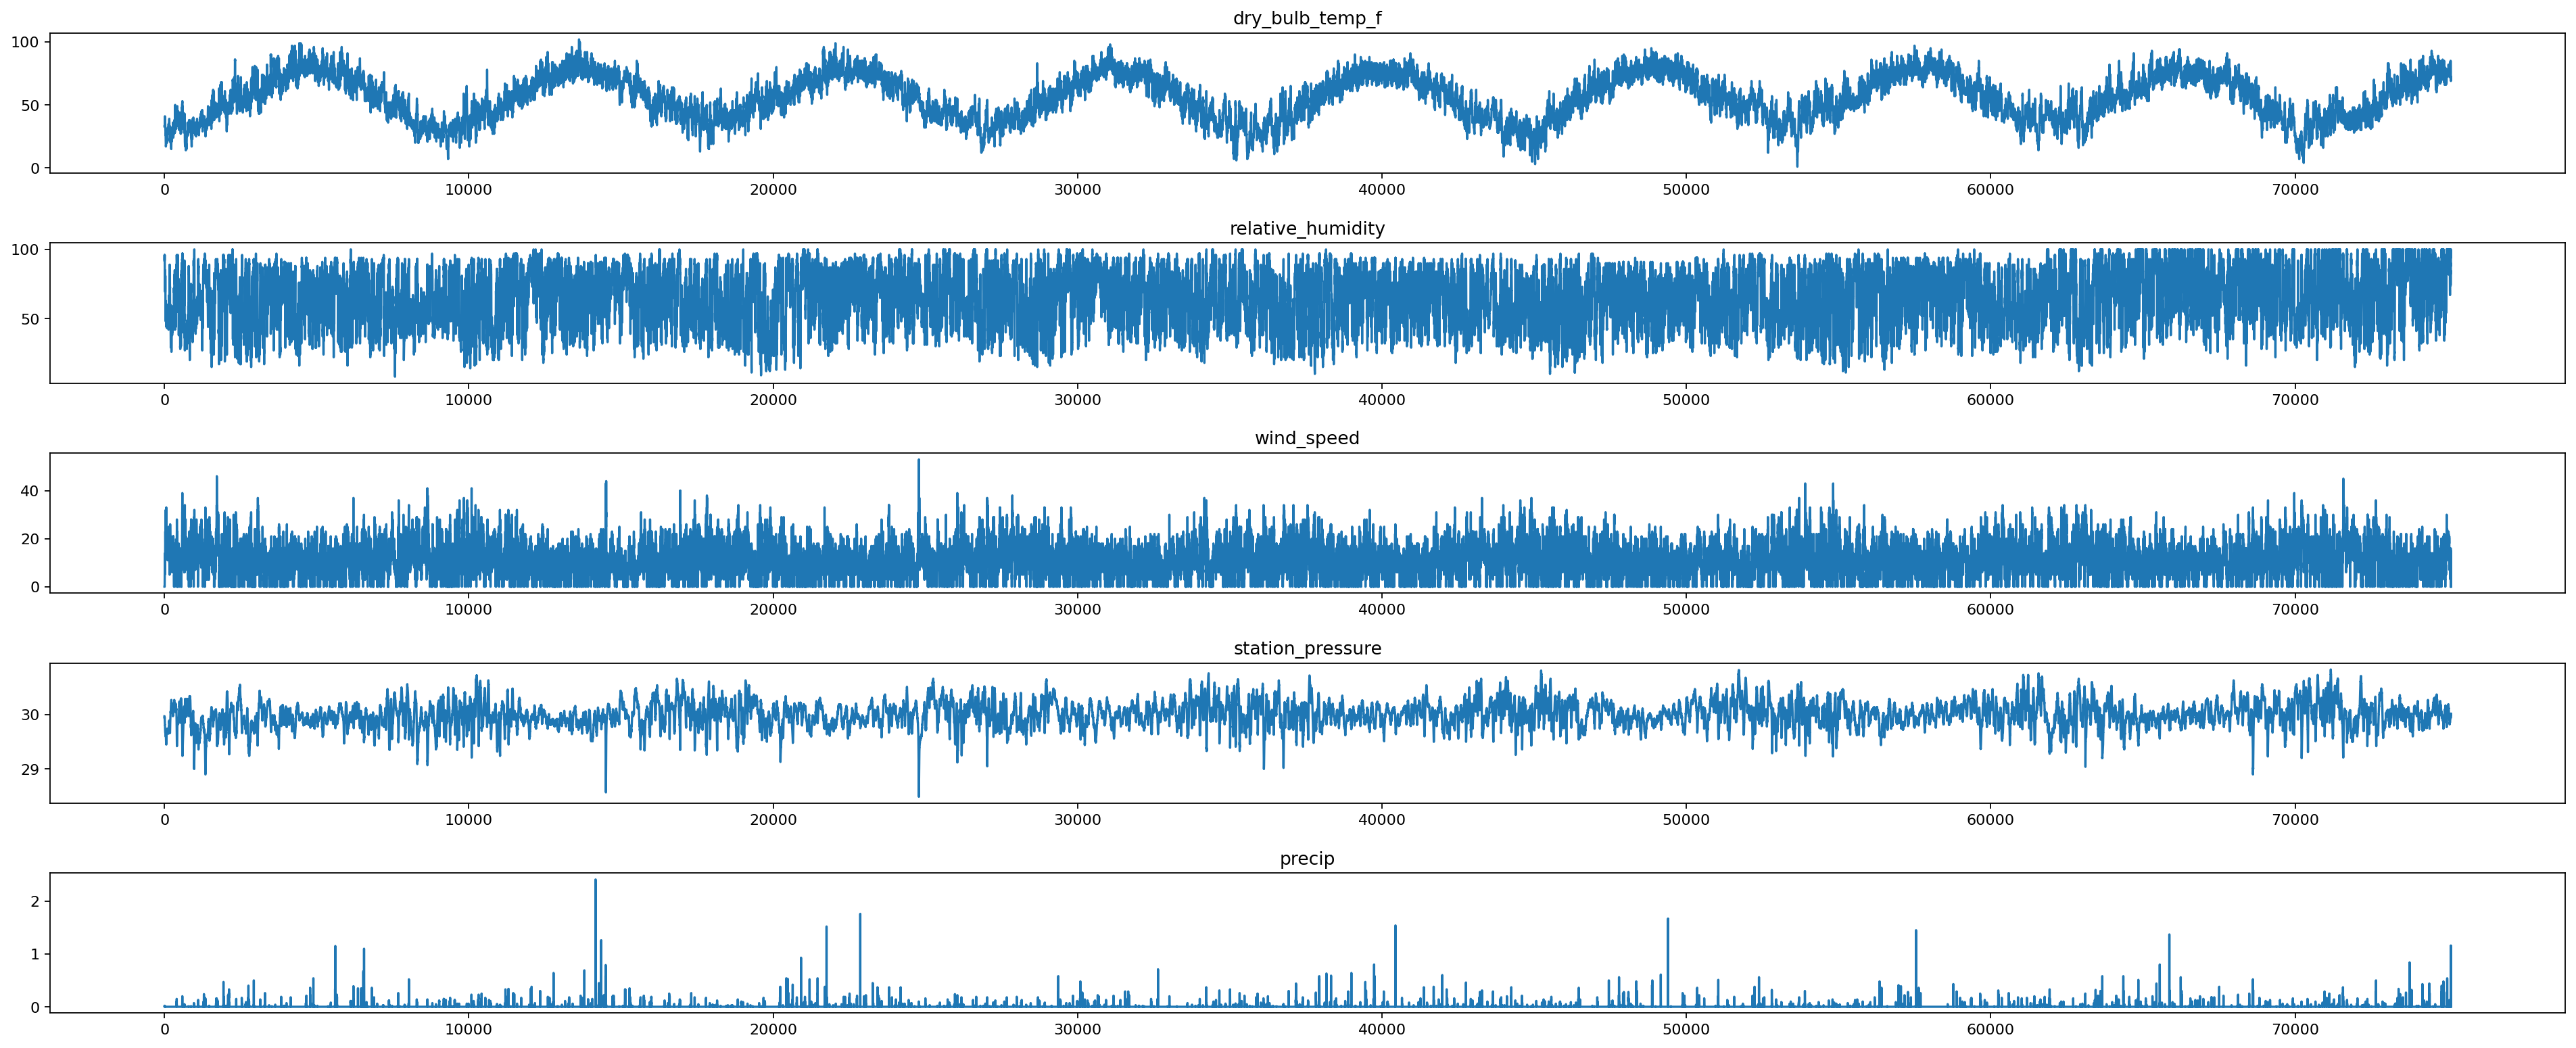

In [74]:
# Quick overview of columns
plt.figure(figsize=(30, 12))
i = 1
for col in plot_cols:
    plt.subplot(len(plot_cols), 1, i)
    plt.plot(data[col].values)
    plt.title(col)
    i += 1
plt.subplots_adjust(hspace=0.5)
plt.show()

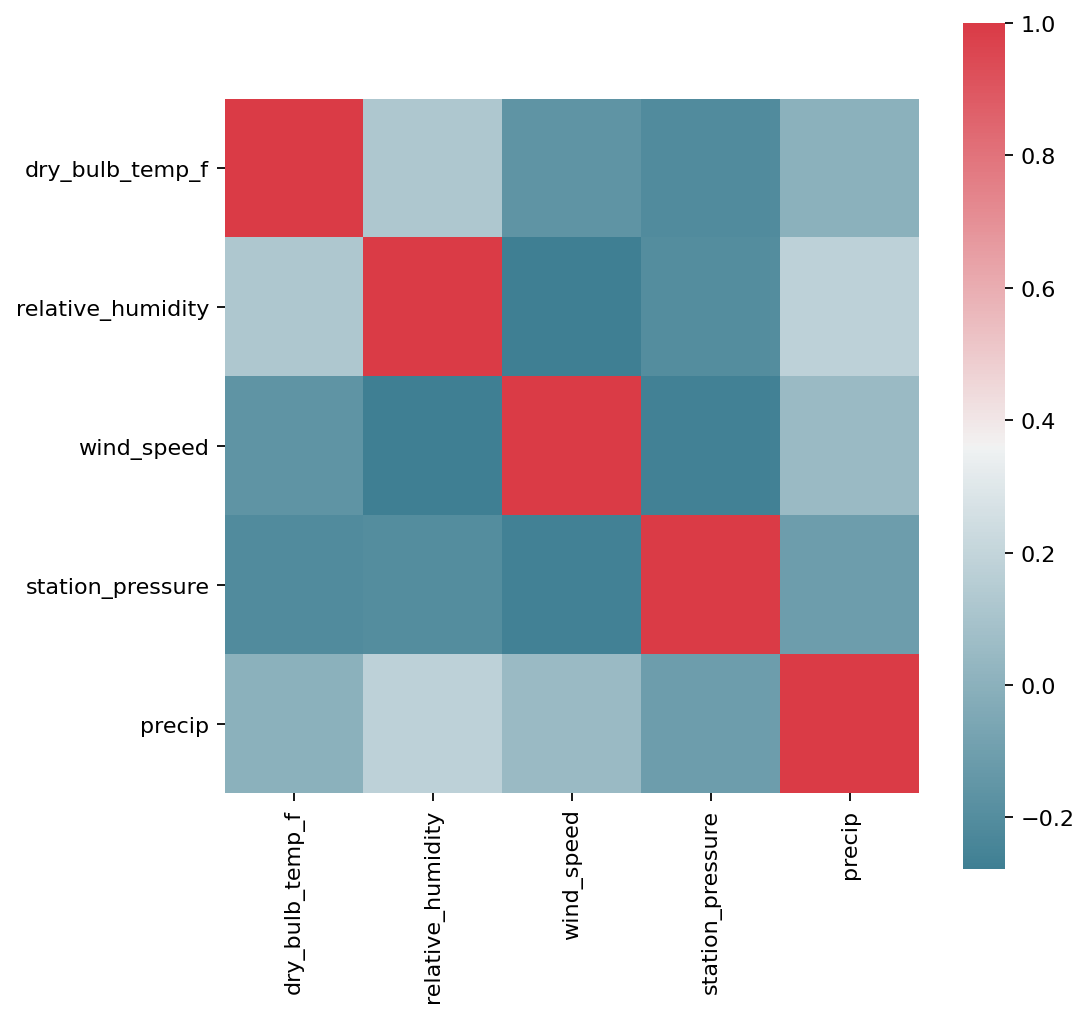

In [75]:
# Plot correlation matrix
f, ax = plt.subplots(figsize=(7, 7))
corr = data[plot_cols].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax);

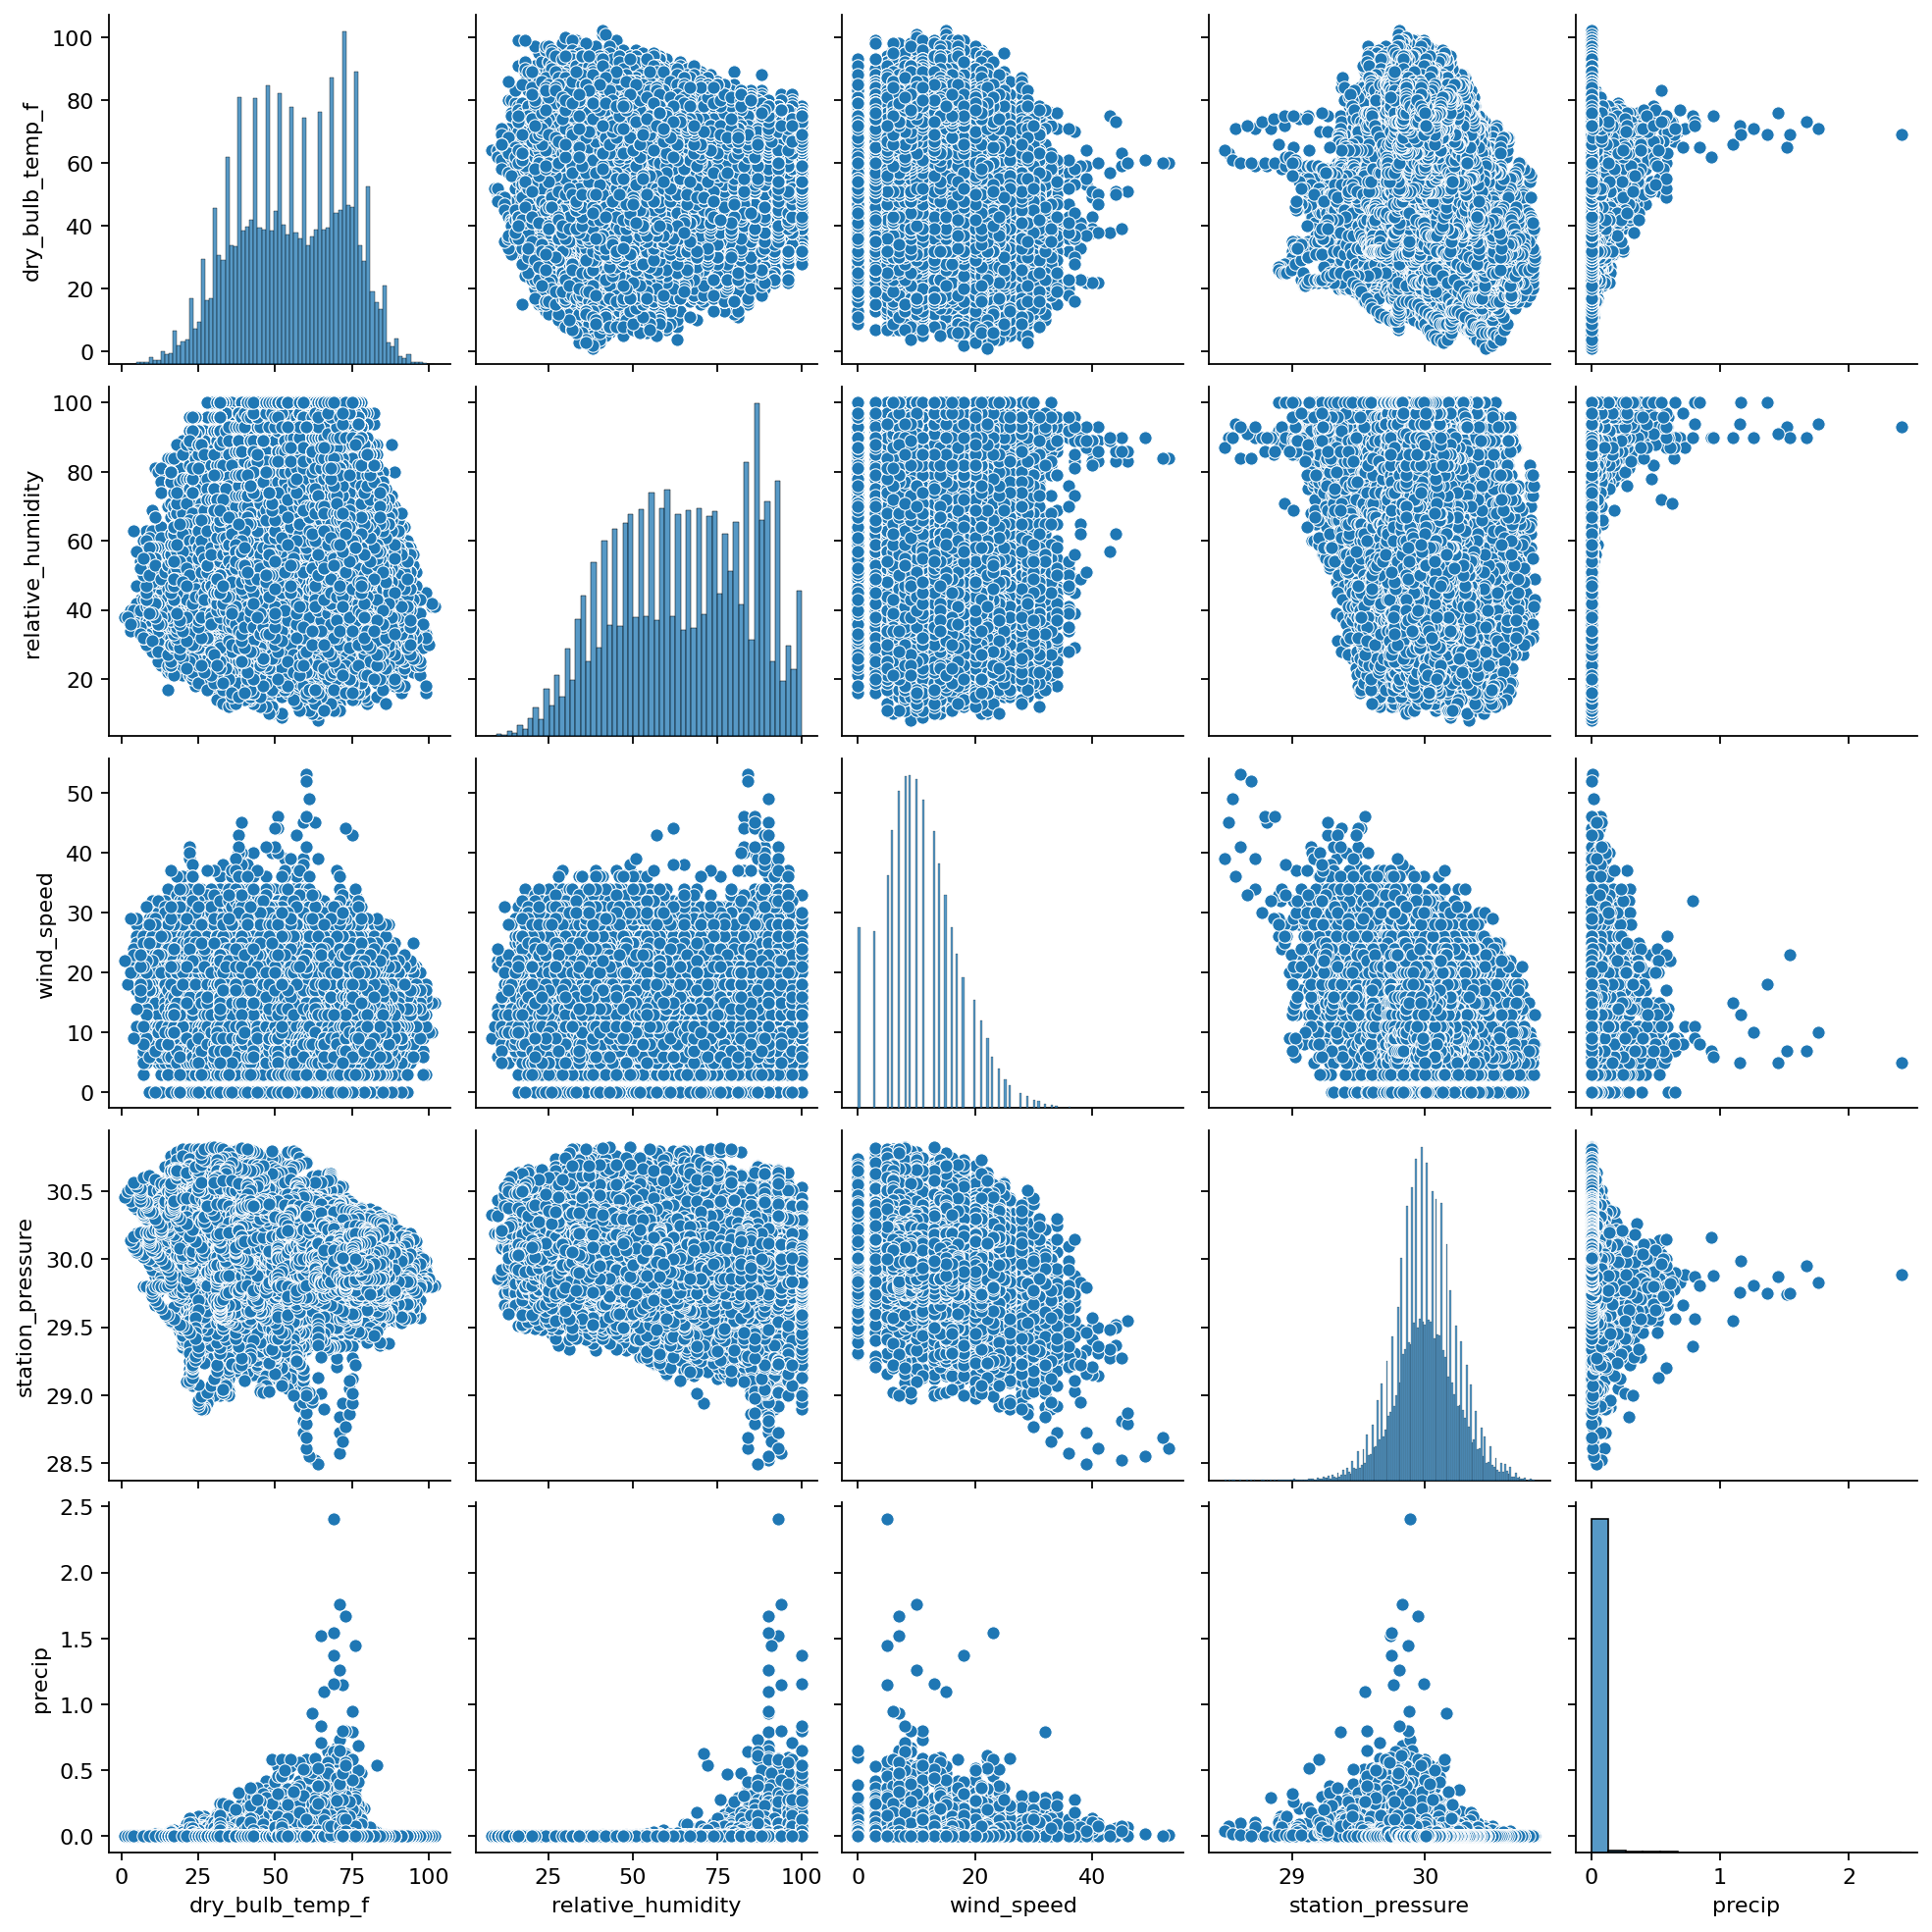

In [76]:
# Plot pairplots
sns.pairplot(data[plot_cols])

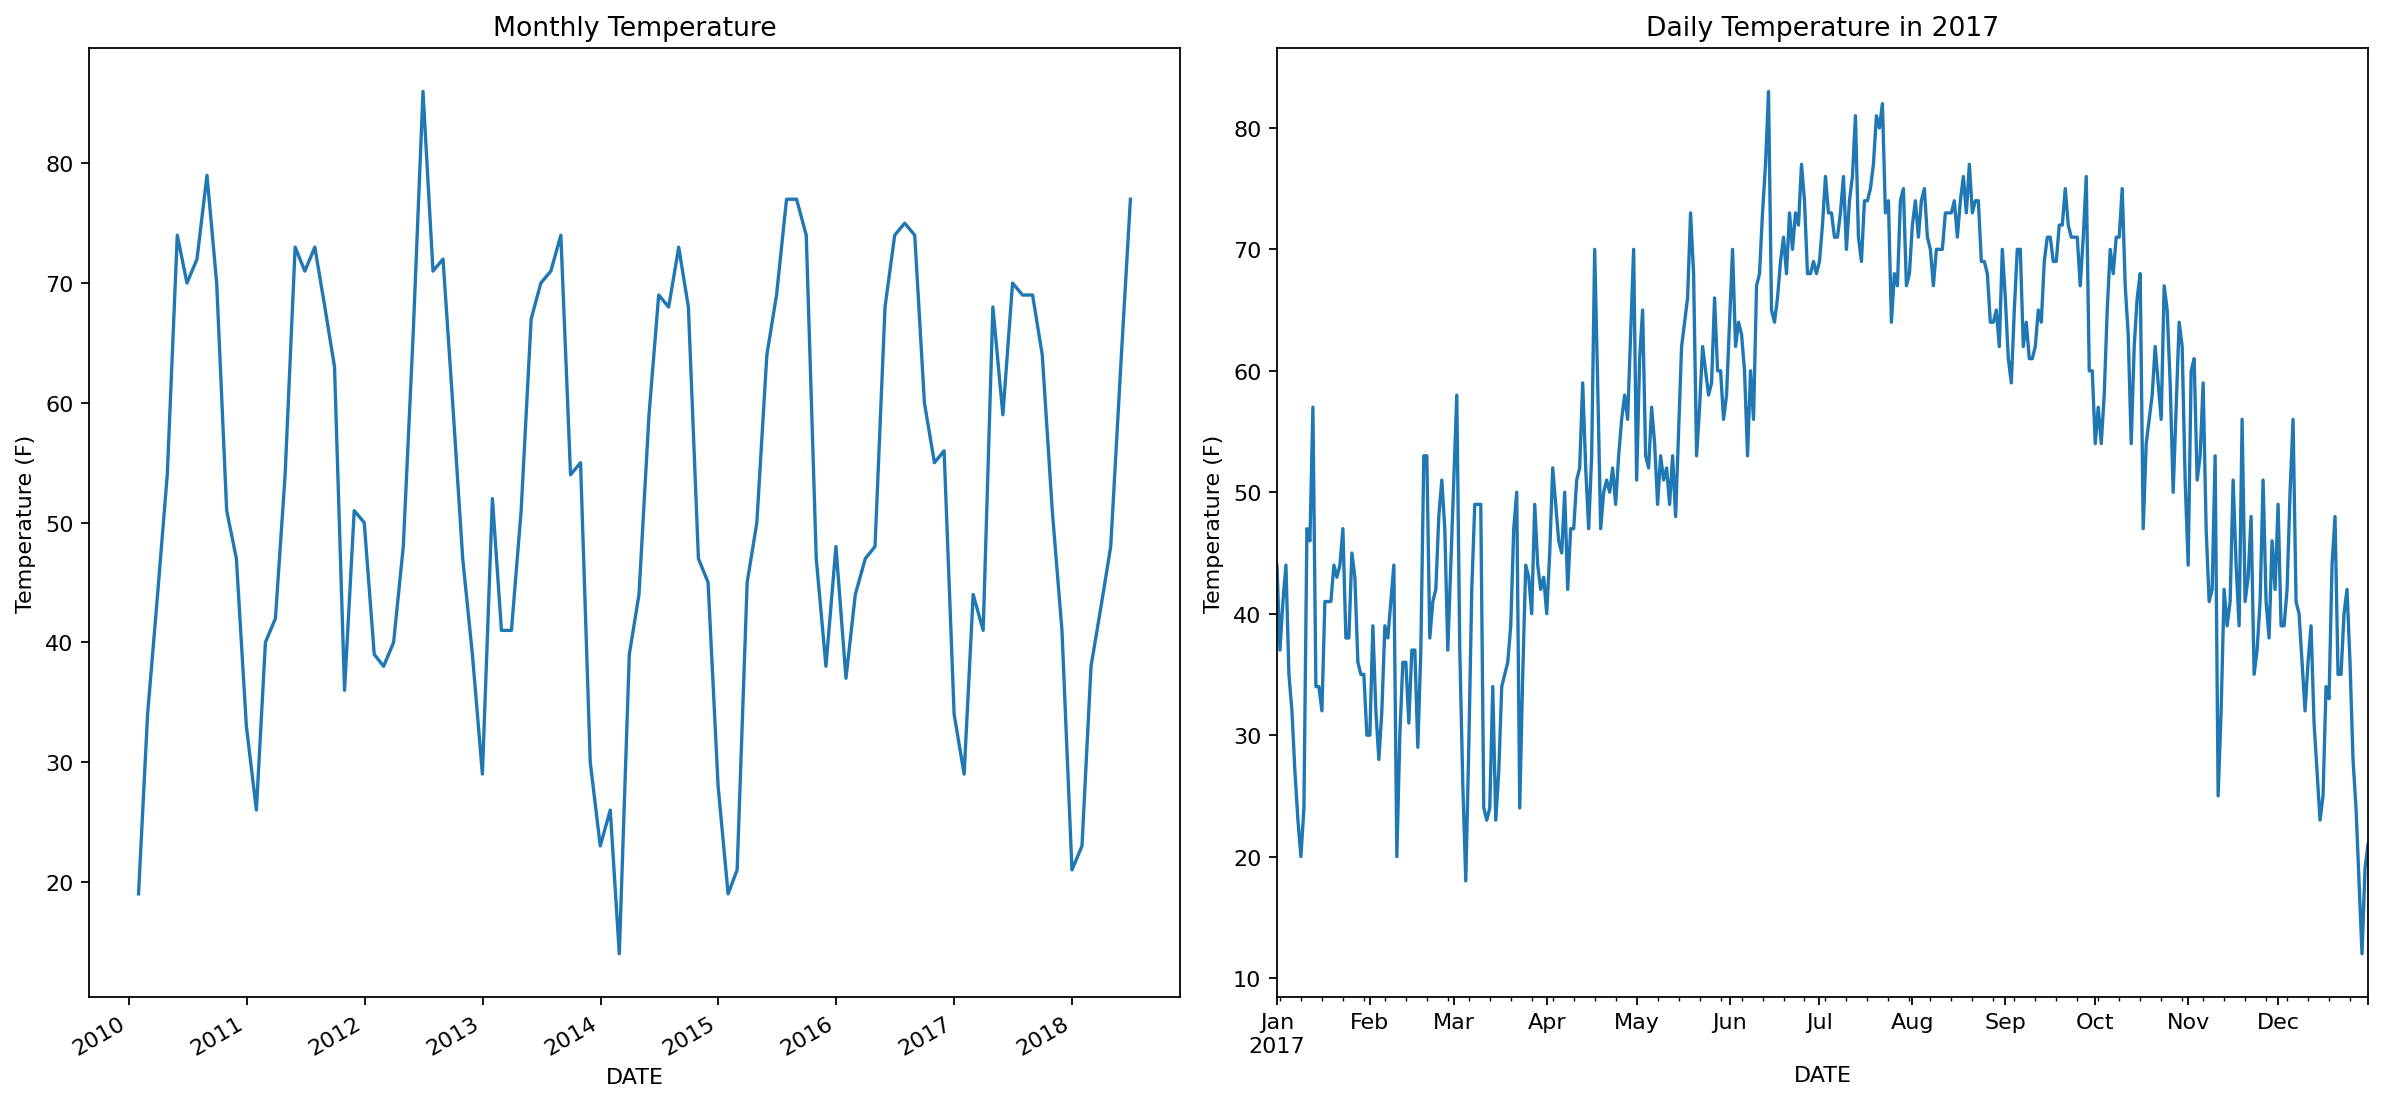

In [77]:
plt.figure(figsize=(15,7))

TEMP_COL = 'dry_bulb_temp_f'
# Plot temperature data converted to a monthly frequency 
plt.subplot(1, 2, 1)
data[TEMP_COL].asfreq('M').plot()  
plt.title('Monthly Temperature')
plt.ylabel('Temperature (F)')

# Zoom in on a year and plot temperature data converted to a daily frequency 
plt.subplot(1, 2, 2)
data['2017'][TEMP_COL].asfreq('D').plot()  
plt.title('Daily Temperature in 2017')
plt.ylabel('Temperature (F)')

plt.tight_layout()
plt.show()

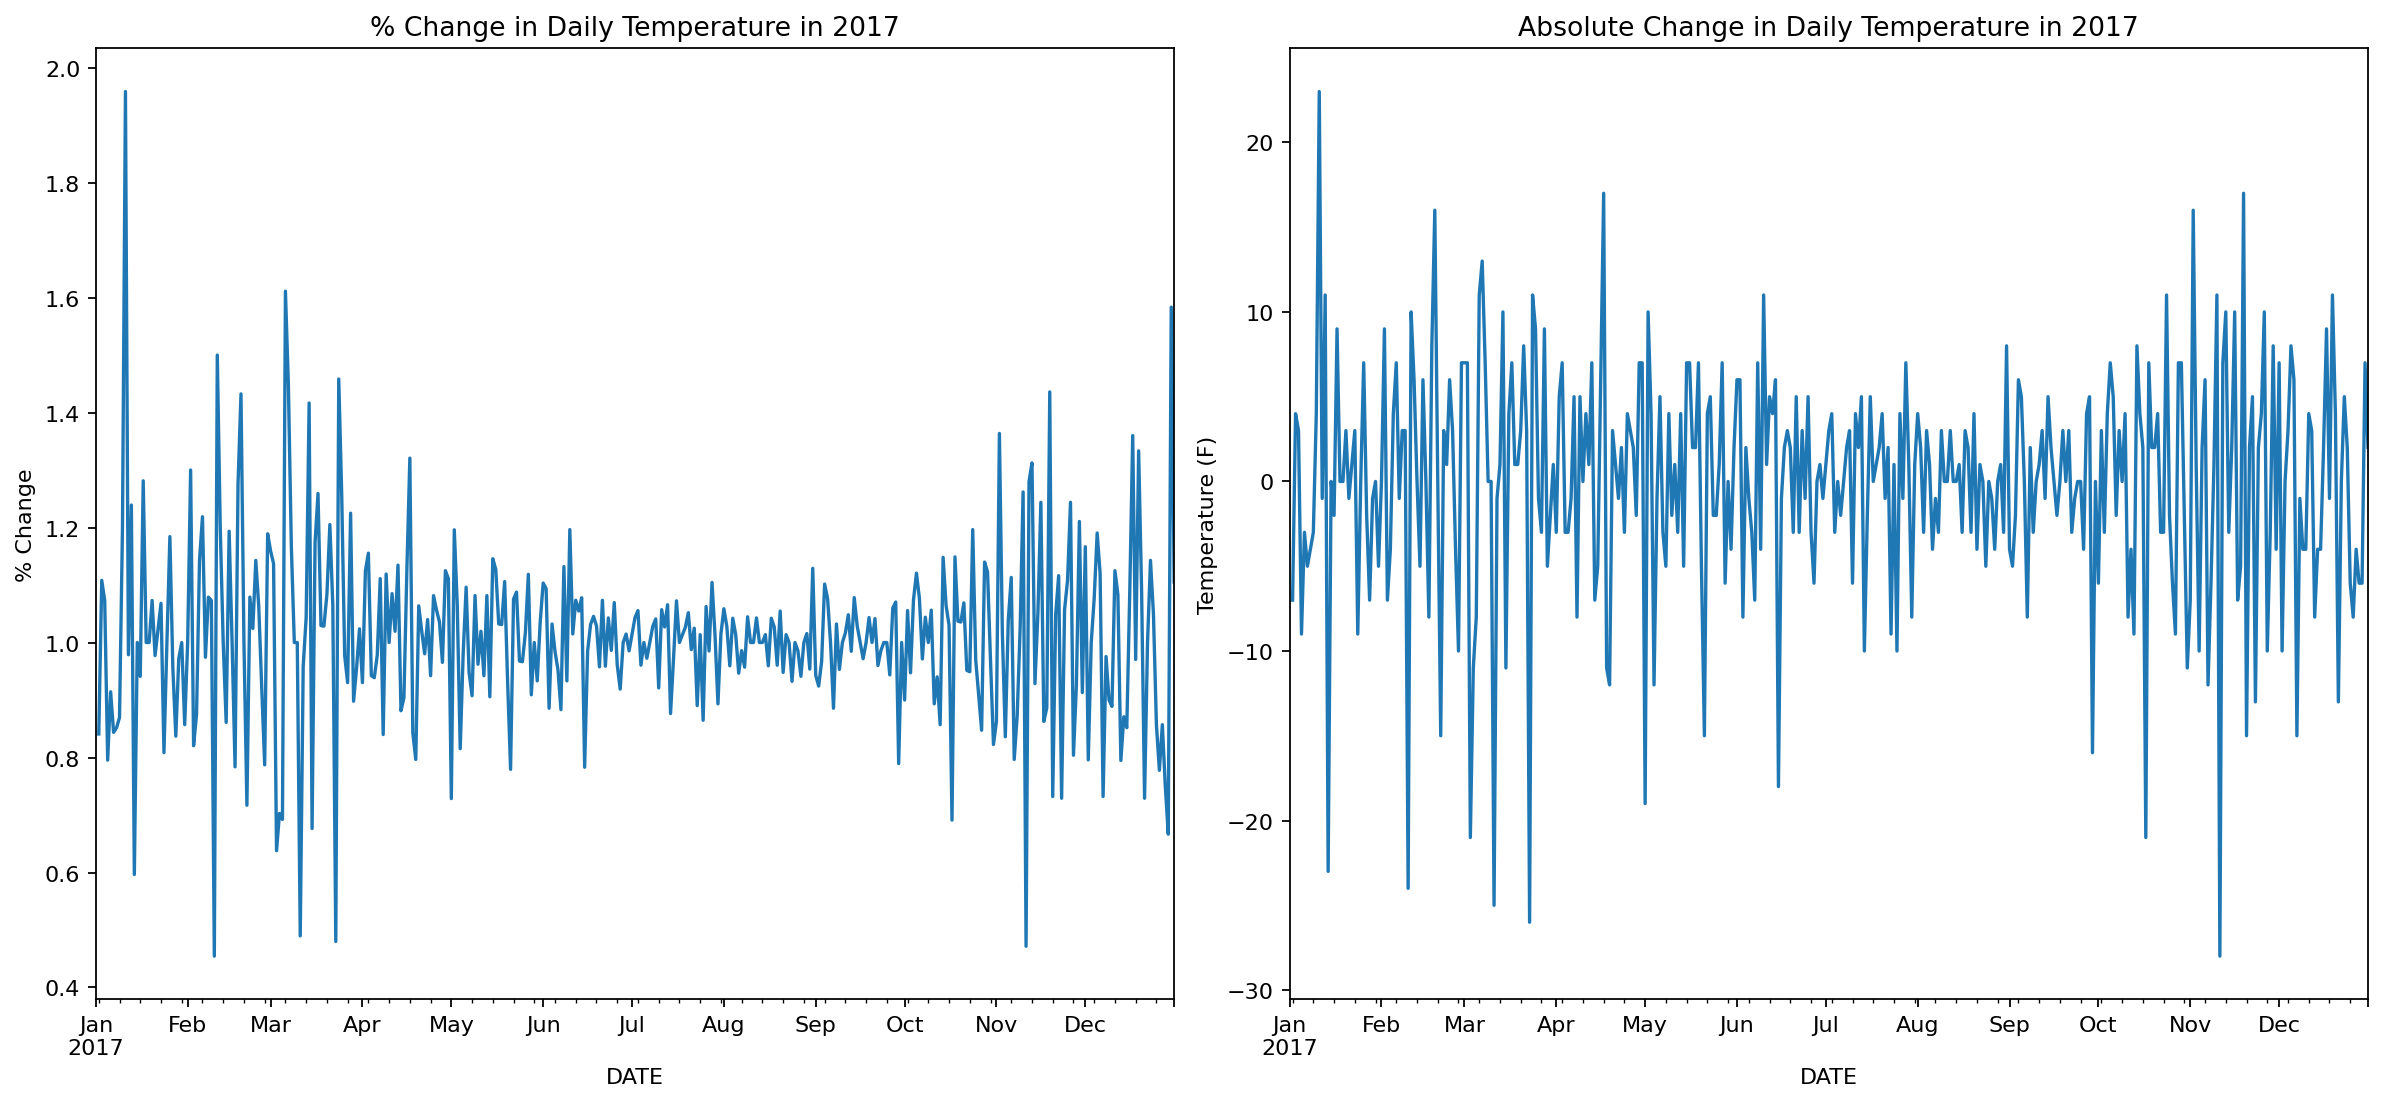

In [78]:
plt.figure(figsize=(15,7))

# Plot percent change of daily temperature in 2017
plt.subplot(1, 2, 1)
data['2017'][TEMP_COL].asfreq('D').div(data['2017'][TEMP_COL].asfreq('D').shift()).plot()
plt.title('% Change in Daily Temperature in 2017')
plt.ylabel('% Change')

# Plot absolute change of temperature in 2017 with daily frequency
plt.subplot(1, 2, 2)
data['2017'][TEMP_COL].asfreq('D').diff().plot()
plt.title('Absolute Change in Daily Temperature in 2017')
plt.ylabel('Temperature (F)')

plt.tight_layout()
plt.show()

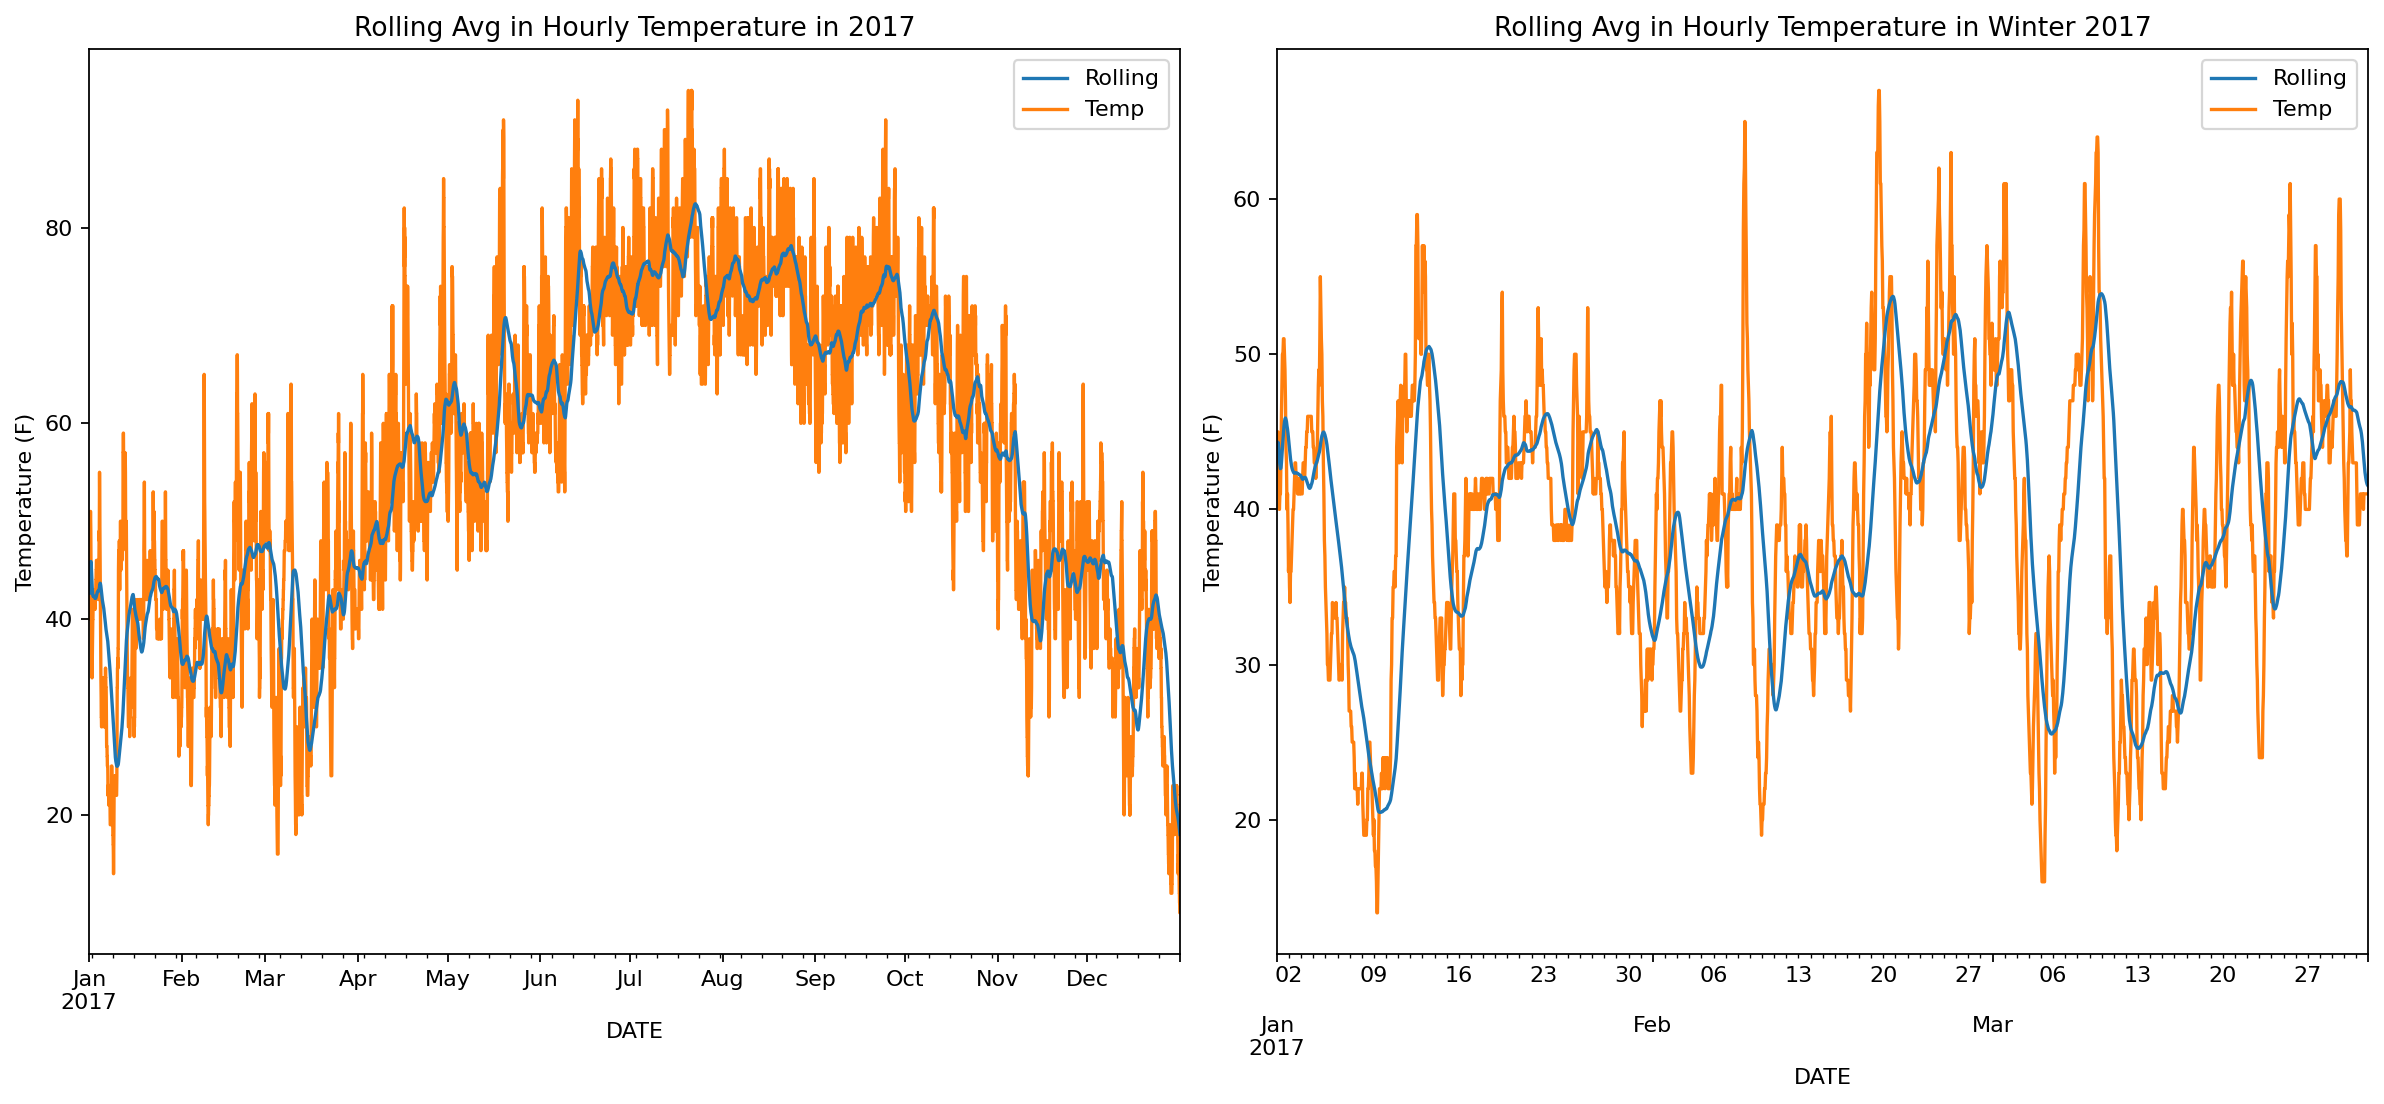

In [79]:
plt.figure(figsize=(15,7))

# Plot rolling mean of temperature 
plt.subplot(1, 2, 1)
data['2017'][TEMP_COL].rolling('5D').mean().plot(zorder=2) # Rolling average window is 5 days
data['2017'][TEMP_COL].plot(zorder=1)
plt.legend(['Rolling','Temp'])
plt.title('Rolling Avg in Hourly Temperature in 2017')
plt.ylabel('Temperature (F)')

# Plot rolling mean of temperature
plt.subplot(1, 2, 2)
data['2017-01':'2017-03'][TEMP_COL].rolling('2D').mean().plot(zorder=2) # Rolling average window is 2 days
data['2017-01':'2017-03'][TEMP_COL].plot(zorder=1)
plt.legend(['Rolling','Temp'])
plt.title('Rolling Avg in Hourly Temperature in Winter 2017')
plt.ylabel('Temperature (F)')

plt.tight_layout()
plt.show()

In [80]:
!pip install statsmodels
!pip install sklearn
!pip install matplotlib

     |████████████████████████████████| 9.5 MB 17.4 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 86.7 MB/s eta 0:00:01
You should consider upgrading via the '/opt/app-root/bin/python3.6 -m pip install --upgrade pip' command.
     |████████████████████████████████| 6.8 MB 26.8 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 80.6 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=2c57d25dc6485ea9abcd723d40c56056577e6726785fced2783b13b0400a0ce0
  Stored in directory: /tmp/pip-ephem-wheel-cache-wefvvfl_/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn
You should consider upgrading via the '/opt/app-root/bin/python3.6 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.6 -m pip install --upgrade pip' command.


In [81]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt

In [82]:
data = pd.read_csv('noaa-weather-data-jfk-airport/jfk_weather_cleaned.csv', parse_dates=['DATE'])

In [83]:
# Set date index
data = data.set_index(pd.DatetimeIndex(data['DATE']))
data.drop(['DATE'], axis=1, inplace=True)
data.head()

visibility  dry_bulb_temp_f  wet_bulb_temp_f  \
DATE                                                                
2010-01-01 01:00:00         6.0             33.0             32.0   
2010-01-01 02:00:00         6.0             33.0             33.0   
2010-01-01 03:00:00         5.0             33.0             33.0   
2010-01-01 04:00:00         5.0             33.0             33.0   
2010-01-01 05:00:00         5.0             33.0             32.0   

                     dew_point_temp_f  relative_humidity  wind_speed  \
DATE                                                                   
2010-01-01 01:00:00              31.0               92.0         0.0   
2010-01-01 02:00:00              32.0               96.0         0.0   
2010-01-01 03:00:00              32.0               96.0         0.0   
2010-01-01 04:00:00              32.0               96.0         0.0   
2010-01-01 05:00:00              31.0               92.0         0.0   

                     station_pressure  sea_level_pressure  precip  \
DATE                                                                
2010-01-01 01:00:00             29.97               29.99    0.01   
2010-01-01 02:00:00             29.97               29.99    0.02   
2010-01-01 03:00:00             29.97               29.99    0.00   
2010-01-01 04:00:00             29.95               29.97    0.00   
2010-01-01 05:00:00             29.93               29.96    0.00   

                     altimeter_setting  wind_direction_sin  \
DATE                                                         
2010-01-01 01:00:00              29.99                 0.0   
2010-01-01 02:00:00              29.99                 0.0   
2010-01-01 03:00:00              29.99                 0.0   
2010-01-01 04:00:00              29.97                 0.0   
2010-01-01 05:00:00              29.95                 0.0   

                     wind_direction_cos  pressure_tendency_incr  \
DATE                                                              
2010-01-01 01:00:00                 1.0                       0   
2010-01-01 02:00:00                 1.0                       0   
2010-01-01 03:00:00                 1.0                       0   
2010-01-01 04:00:00                 1.0                       0   
2010-01-01 05:00:00                 1.0                       0   

                     pressure_tendency_decr  pressure_tendency_const  
DATE                                                                  
2010-01-01 01:00:00                       1                        0  
2010-01-01 02:00:00                       1                        0  
2010-01-01 03:00:00                       1                        0  
2010-01-01 04:00:00                       1                        0  
2010-01-01 05:00:00                       1                        0

In [84]:
sample = data['2016-01-01':'2018-01-01']
sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17568 entries, 2016-01-01 00:00:00 to 2018-01-01 23:00:00
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   visibility               17568 non-null  float64
 1   dry_bulb_temp_f          17568 non-null  float64
 2   wet_bulb_temp_f          17568 non-null  float64
 3   dew_point_temp_f         17568 non-null  float64
 4   relative_humidity        17568 non-null  float64
 5   wind_speed               17568 non-null  float64
 6   station_pressure         17568 non-null  float64
 7   sea_level_pressure       17568 non-null  float64
 8   precip                   17568 non-null  float64
 9   altimeter_setting        17568 non-null  float64
 10  wind_direction_sin       17568 non-null  float64
 11  wind_direction_cos       17568 non-null  float64
 12  pressure_tendency_incr   17568 non-null  int64  
 13  pressure_tendency_decr   17568 non-null  

In [85]:
def split_data(data, val_size=0.1, test_size=0.1):
    """
    Splits data to training, validation and testing parts
    """
    ntest = int(round(len(data) * (1 - test_size)))
    nval = int(round(len(data) * (1 - test_size - val_size)))

    df_train, df_val, df_test = data.iloc[:nval], data.iloc[nval:ntest], data.iloc[ntest:]
    
    return df_train, df_val, df_test


# Create data split
df_train, df_val, df_test = split_data(sample)

print('Total data size:      {} rows'.format(len(sample)))
print('Training set size:    {} rows'.format(len(df_train)))
print('Validation set size:  {} rows'.format(len(df_val)))
print('Test set size:        {} rows'.format(len(df_test)))

Total data size:      17568 rows
Training set size:    14054 rows
Validation set size:  1757 rows
Test set size:        1757 rows


In [86]:
# define the column containing the data we wish to model - in this case Dry Bulb Temperature (F)
Y_COL = 'dry_bulb_temp_f'

# Use shifting and rolling averages to predict Y_COL (t)
n_in = 2
n_out = 1
features = [Y_COL]
n_features = len(features)

# create the baseline on the entire sample dataset.
# we will evaluate the prediction error on the validation set
baseline = sample[[Y_COL]].loc[:]
baseline['{} (t-1)'.format(Y_COL)] = baseline[Y_COL].shift(1)
baseline['{} (t-2)'.format(Y_COL)] = baseline[Y_COL].shift(2)
baseline['{} (6hr rollavg)'.format(Y_COL)] = baseline[Y_COL].rolling('6H').mean()
baseline['{} (12hr rollavg)'.format(Y_COL)] = baseline[Y_COL].rolling('12H').mean()
baseline.dropna(inplace=True)
baseline.head(10)

dry_bulb_temp_f  dry_bulb_temp_f (t-1)  \
DATE                                                          
2016-01-01 02:00:00             43.0                   43.0   
2016-01-01 03:00:00             42.0                   43.0   
2016-01-01 04:00:00             43.0                   42.0   
2016-01-01 05:00:00             42.0                   43.0   
2016-01-01 06:00:00             41.0                   42.0   
2016-01-01 07:00:00             41.0                   41.0   
2016-01-01 08:00:00             41.0                   41.0   
2016-01-01 09:00:00             40.0                   41.0   
2016-01-01 10:00:00             41.0                   40.0   
2016-01-01 11:00:00             41.0                   41.0   

                     dry_bulb_temp_f (t-2)  dry_bulb_temp_f (6hr rollavg)  \
DATE                                                                        
2016-01-01 02:00:00                   44.0                      43.333333   
2016-01-01 03:00:00                   43.0                      43.000000   
2016-01-01 04:00:00                   43.0                      43.000000   
2016-01-01 05:00:00                   42.0                      42.833333   
2016-01-01 06:00:00                   43.0                      42.333333   
2016-01-01 07:00:00                   42.0                      42.000000   
2016-01-01 08:00:00                   41.0                      41.666667   
2016-01-01 09:00:00                   41.0                      41.333333   
2016-01-01 10:00:00                   41.0                      41.000000   
2016-01-01 11:00:00                   40.0                      40.833333   

                     dry_bulb_temp_f (12hr rollavg)  
DATE                                                 
2016-01-01 02:00:00                       43.333333  
2016-01-01 03:00:00                       43.000000  
2016-01-01 04:00:00                       43.000000  
2016-01-01 05:00:00                       42.833333  
2016-01-01 06:00:00                       42.571429  
2016-01-01 07:00:00                       42.375000  
2016-01-01 08:00:00                       42.222222  
2016-01-01 09:00:00                       42.000000  
2016-01-01 10:00:00                       41.909091  
2016-01-01 11:00:00                       41.833333

In [87]:
# plot first 7 days of the validation set, 168 hours 
start = df_val.index[0]
end = df_val.index[167]
sliced = baseline[start:end]

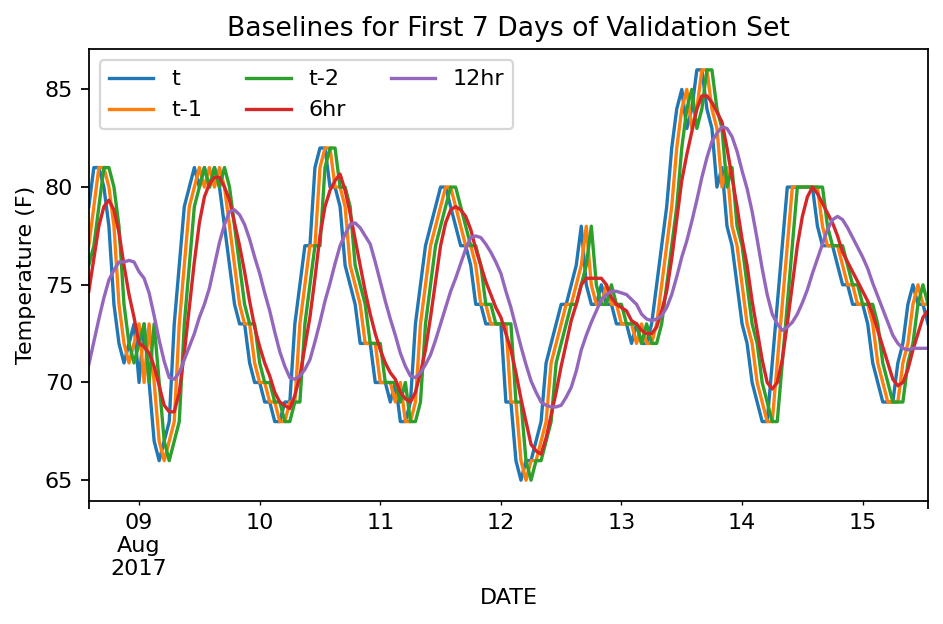

In [88]:
# Plot baseline predictions sample
cols = ['dry_bulb_temp_f', 'dry_bulb_temp_f (t-1)', 'dry_bulb_temp_f (t-2)', 'dry_bulb_temp_f (6hr rollavg)', 'dry_bulb_temp_f (12hr rollavg)']
sliced[cols].plot()

plt.legend(['t', 't-1', 't-2', '6hr', '12hr'], loc=2, ncol=3)
plt.title('Baselines for First 7 Days of Validation Set')
plt.ylabel('Temperature (F)')
plt.tight_layout()
plt.rcParams['figure.dpi'] = 100
plt.show()

In [89]:
# Calculating baseline RMSE
start_val = df_val.index[0]
end_val = df_val.index[-1]
baseline_val = baseline[start_val:end_val]

baseline_y = baseline_val[Y_COL]
baseline_t1 = baseline_val['dry_bulb_temp_f (t-1)']
baseline_t2 = baseline_val['dry_bulb_temp_f (t-2)']
baseline_avg6 = baseline_val['dry_bulb_temp_f (6hr rollavg)']
baseline_avg12 = baseline_val['dry_bulb_temp_f (12hr rollavg)']

rmse_t1 = round(np.sqrt(mean_squared_error(baseline_y, baseline_t1)), 2)
rmse_t2 = round(np.sqrt(mean_squared_error(baseline_y, baseline_t2)), 2)
rmse_avg6 = round(np.sqrt(mean_squared_error(baseline_y, baseline_avg6)), 2)
rmse_avg12 = round(np.sqrt(mean_squared_error(baseline_y, baseline_avg12)), 2)

print('Baseline t-1 RMSE:            {0:.3f}'.format(rmse_t1))
print('Baseline t-2 RMSE:            {0:.3f}'.format(rmse_t2))
print('Baseline 6hr rollavg RMSE:    {0:.3f}'.format(rmse_avg6))
print('Baseline 12hr rollavg RMSE:   {0:.3f}'.format(rmse_avg12))

Baseline t-1 RMSE:            1.690
Baseline t-2 RMSE:            2.880
Baseline 6hr rollavg RMSE:    3.080
Baseline 12hr rollavg RMSE:   5.010


In [90]:
X_train = df_train[Y_COL]
X_val = df_val[Y_COL]
X_both = np.hstack((X_train, X_val))

In [91]:
order = (1, 0, 0)
model_ar1 = SARIMAX(X_train, order=order)
results_ar1 = model_ar1.fit()
results_ar1.summary()

/opt/app-root/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/opt/app-root/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        dry_bulb_temp_f   No. Observations:                14054
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -27650.431
Date:                Mon, 09 Nov 2020   AIC                          55304.863
Time:                        21:33:44   BIC                          55319.964
Sample:                    01-01-2016   HQIC                         55309.889
                         - 08-08-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.000   4277.653      0.000       0.999       1.000
sigma2         2.9937      0.024    125.518      0.000       2.947       3.040
===================================================================================
Ljung-Box (L1) (Q):                1479.79   Jarque-Bera (JB):              3656.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.15
Prob(H) (two-sided):                  0.26   Kurtosis:                         5.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
full_data_ar1 = SARIMAX(X_both, order=order)
model_forecast_ar1 = full_data_ar1.filter(results_ar1.params)

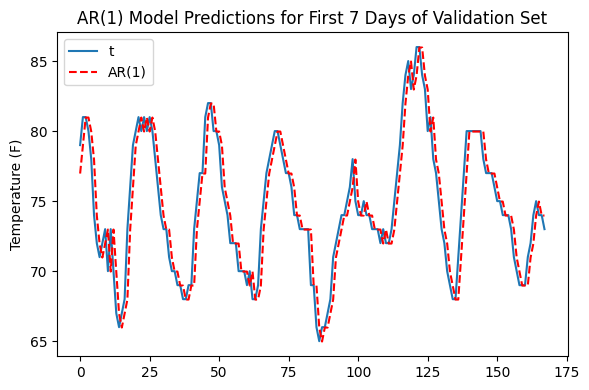

In [93]:
start = len(X_train)
end = len(X_both)
forecast_ar1 = model_forecast_ar1.predict(start=start, end=end - 1, dynamic=False)

# plot actual vs predicted values for the same 7-day window for easier viewing
plt.plot(sliced[Y_COL].values)
plt.plot(forecast_ar1[:168], color='r', linestyle='--')
plt.legend(['t', 'AR(1)'], loc=2)
plt.title('AR(1) Model Predictions for First 7 Days of Validation Set')
plt.ylabel('Temperature (F)')
plt.tight_layout()
plt.show()

In [94]:


# compute print RMSE values
rmse_ar1 = np.sqrt(mean_squared_error(baseline_val[Y_COL], forecast_ar1))
print('AR(1) RMSE:                   {0:.3f}'.format(rmse_ar1))
print('Baseline t-1 RMSE:            {0:.3f}'.format(rmse_t1))



AR(1) RMSE:                   1.692
Baseline t-1 RMSE:            1.690


In [95]:
order = (2, 0, 0)
model_ar2 = SARIMAX(X_train, order=order)
results_ar2 = model_ar2.fit()
results_ar2.summary()

/opt/app-root/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/opt/app-root/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        dry_bulb_temp_f   No. Observations:                14054
Model:               SARIMAX(2, 0, 0)   Log Likelihood              -26867.232
Date:                Mon, 09 Nov 2020   AIC                          53740.465
Time:                        21:34:25   BIC                          53763.117
Sample:                    01-01-2016   HQIC                         53748.005
                         - 08-08-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3242      0.006    220.175      0.000       1.312       1.336
ar.L2         -0.3248      0.006    -53.852      0.000      -0.337      -0.313
sigma2         2.6779      0.020    136.374      0.000       2.639       2.716
===================================================================================
Ljung-Box (L1) (Q):                  48.01   Jarque-Bera (JB):              7579.33
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.01
Prob(H) (two-sided):                  0.75   Kurtosis:                         6.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
full_data_ar2 = SARIMAX(X_both, order=order)
model_forecast_ar2 = full_data_ar2.filter(results_ar2.params)

start = len(X_train)
end = len(X_both)
forecast_ar2 = model_forecast_ar2.predict(start=start, end=end - 1, dynamic=False)

# compute print RMSE values
rmse_ar2 = np.sqrt(mean_squared_error(baseline_val[Y_COL], forecast_ar2))
print('AR(2) RMSE:                   {0:.3f}'.format(rmse_ar2))
print('AR(1) RMSE:                   {0:.3f}'.format(rmse_ar1))
print('Baseline t-1 RMSE:            {0:.3f}'.format(rmse_t1))

AR(2) RMSE:                   1.526
AR(1) RMSE:                   1.692
Baseline t-1 RMSE:            1.690


In [97]:
order = (2, 0, 1)
model_ar2ma1 = SARIMAX(X_train, order=order)
results_ar2ma1 = model_ar2ma1.fit()
results_ar2ma1.summary()

/opt/app-root/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/opt/app-root/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        dry_bulb_temp_f   No. Observations:                14054
Model:               SARIMAX(2, 0, 1)   Log Likelihood              -26667.060
Date:                Mon, 09 Nov 2020   AIC                          53342.120
Time:                        21:34:49   BIC                          53372.322
Sample:                    01-01-2016   HQIC                         53352.172
                         - 08-08-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6697      0.015    114.448      0.000       1.641       1.698
ar.L2         -0.6700      0.015    -45.898      0.000      -0.699      -0.641
ma.L1         -0.3825      0.016    -23.348      0.000      -0.415      -0.350
sigma2         2.6026      0.019    139.868      0.000       2.566       2.639
===================================================================================
Ljung-Box (L1) (Q):                   9.80   Jarque-Bera (JB):              8834.61
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.04
Prob(H) (two-sided):                  0.92   Kurtosis:                         6.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
full_data_ar2ma1 = SARIMAX(X_both, order=order)
model_forecast_ar2ma1 = full_data_ar2ma1.filter(results_ar2ma1.params)

start = len(X_train)
end = len(X_both)
forecast_ar2ma1 = model_forecast_ar2ma1.predict(start=start, end=end - 1, dynamic=False)

# compute print RMSE values
rmse_ar2ma1 = np.sqrt(mean_squared_error(baseline_val[Y_COL], forecast_ar2ma1))
print('AR(2) MA(1) RMSE:             {0:.3f}'.format(rmse_ar2ma1))
print('AR(2) RMSE:                   {0:.3f}'.format(rmse_ar2))
print('AR(1) RMSE:                   {0:.3f}'.format(rmse_ar1))
print('Baseline t-1 RMSE:            {0:.3f}'.format(rmse_t1))

AR(2) MA(1) RMSE:             1.491
AR(2) RMSE:                   1.526
AR(1) RMSE:                   1.692
Baseline t-1 RMSE:            1.690


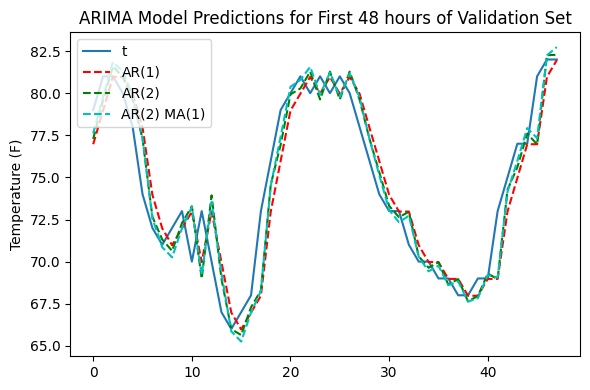

In [99]:
# plot actual vs predicted values for a smaller 2-day window for easier viewing
hrs = 48
plt.plot(sliced[Y_COL][:hrs].values)
plt.plot(forecast_ar1[:hrs], color='r', linestyle='--')
plt.plot(forecast_ar2[:hrs], color='g', linestyle='--')
plt.plot(forecast_ar2ma1[:hrs], color='c', linestyle='--')
plt.legend(['t', 'AR(1)', 'AR(2)', 'AR(2) MA(1)'], loc=2, ncol=1)
plt.title('ARIMA Model Predictions for First 48 hours of Validation Set')
plt.ylabel('Temperature (F)')
plt.tight_layout()
plt.show()